In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.rename({'N' : 'Nitrogen',"P" : 'Phosphorous'	,'K' :  "Potassium"}, axis=1 , inplace=True)

In [5]:
df.head()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


<Axes: >

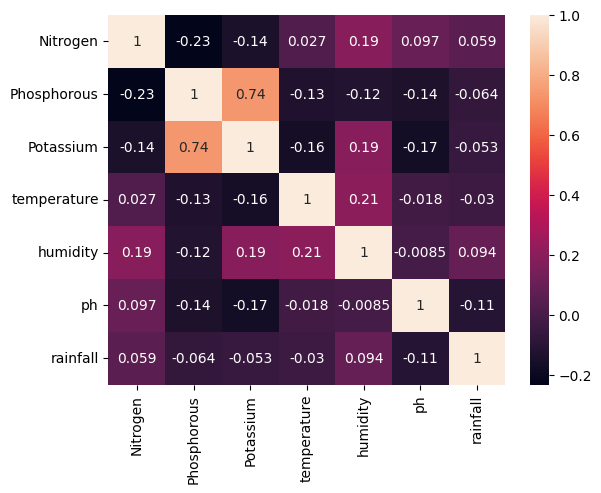

In [6]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True) , annot=True)

In [7]:
df['label'].value_counts()


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [8]:
df['label'].unique().size
#multi classs classification problemmm

22

In [9]:
import matplotlib.pyplot as plt
def cheknormalditri( columns):
    sns.displot(df[columns] , kde = True)
    plt.title(f"Displt of {columns}")
    plt.show()

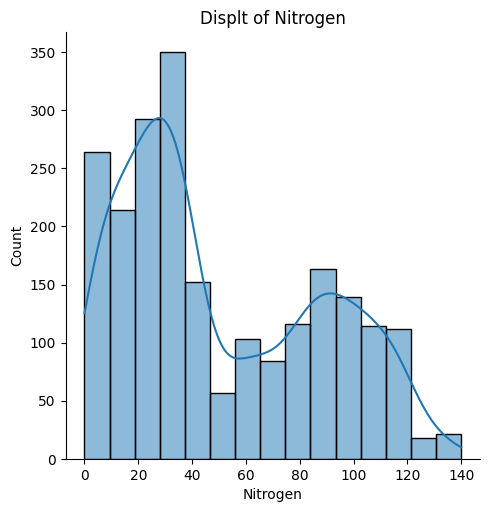

In [10]:
cheknormalditri('Nitrogen')

In [11]:
x = df.drop(['label'] , axis=1)
y = df['label']

In [12]:
from sklearn.model_selection import train_test_split
X_train , x_test , Y_train , y_test = train_test_split(x ,y , test_size=0.2 , random_state=22)

In [13]:
X_train

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
1279,38,135,203,41.361063,82.797830,6.444373,69.921075
845,24,61,17,22.637142,65.445449,6.233269,38.304111
1483,83,15,49,28.927059,91.393568,6.438008,23.200767
831,3,63,16,24.380419,61.184582,6.868882,53.139467
1734,34,61,49,28.129715,93.321074,6.502675,117.820191
...,...,...,...,...,...,...,...
491,4,69,19,19.251001,47.703518,5.374359,149.063196
1382,101,11,51,25.507370,84.243402,6.792036,44.206900
356,31,79,25,23.188644,22.310455,5.902033,63.382088
812,3,69,23,28.674088,63.188330,7.299361,42.960186


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
modelss = {
    'LogisticRegression' : LogisticRegression(),
    'GaussianNB' : GaussianNB(),
    'SVC' : SVC(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
}

In [16]:
for name , model in modelss.items():
    model.fit(X_train , Y_train)
    y_pred = model.predict(x_test)
    scoree = accuracy_score(y_test , y_pred)
    
    print(f"{model} : {scoree} ")

d:\Vs.code\.vscode\CropRecommendation\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 0.9477272727272728 
GaussianNB() : 0.9954545454545455 
SVC() : 0.9795454545454545 
KNeighborsClassifier() : 0.9704545454545455 
DecisionTreeClassifier() : 0.9795454545454545 
RandomForestClassifier() : 0.9931818181818182 


In [17]:
from sklearn.ensemble import RandomForestClassifier
Rm = RandomForestClassifier()
Rm.fit(X_train , Y_train)

RandomForestClassifier()

In [18]:
x_test.shape

(440, 7)

In [19]:
y_pred  = Rm.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred , y_test)

0.990909090909091

In [21]:
data = np.array([[90,42,	43,	20.879744,	82.002744	,6.502985	,202.935536]])
Rm.predict(data)

d:\Vs.code\.vscode\CropRecommendation\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['rice'], dtype=object)

In [22]:
data = np.array([[104,18,	30,	23.6030, 60.3	,6.7	,140.91]])
Rm.predict(data)

d:\Vs.code\.vscode\CropRecommendation\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['coffee'], dtype=object)

In [23]:
import pickle 
pickle.dump(Rm ,open('RandomForestClassifier.pkl', 'wb'))